In [1]:
%matplotlib inline

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

Download the archive version of Kaggle Dog vs Cat and store it in /kaggle_dog_vs_cat/ directory.

In [23]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# extract keyword argument cannot bypass admin permission to
# overwrite file
# use untar instead

dir_name = "cats_and_dogs_filtered"

data_directory = tf.keras.utils.get_file(
   origin = url,
   fname = dir_name,
   untar = True
)

data_directory = pathlib.Path(data_directory)

In [24]:
train_dir = os.path.join(data_directory, "train")
validation_dir = os.path.join(data_directory, "validation")

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [25]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [26]:
batch_size = 128
epochs = 15
img_height = 150
img_width = 150

In [27]:
train_image_gen = ImageDataGenerator(rescale = 1./255)
validation_image_gen = ImageDataGenerator(rescale = 1./255)

In [30]:
train_data_gen = train_image_gen.flow_from_directory(
   batch_size = batch_size,
   directory = train_dir,
   shuffle = True,
   target_size = (img_height, img_width),
   class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


In [31]:
validation_data_gen = validation_image_gen.flow_from_directory(
   batch_size = batch_size,
   directory = validation_dir,
   target_size = (img_height, img_width),
   class_mode = "binary"
)

Found 1000 images belonging to 2 classes.


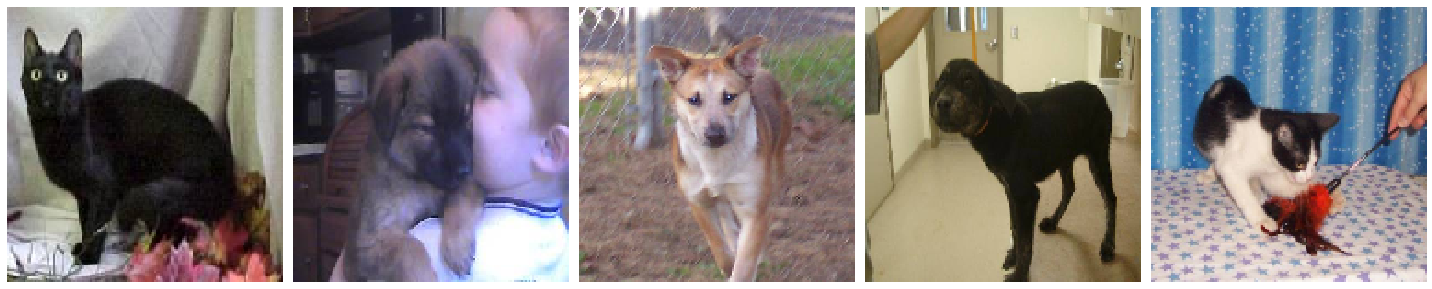

In [38]:
sample_training_image, sample_label = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plot_images(images_arr):
   fig, axes = plt.subplots(1, 5, figsize=(20,20))
   axes = axes.flatten()
   for img, ax in zip( images_arr, axes):
      ax.imshow(img)
      ax.axis('off')
      plt.tight_layout()
   plt.show()
   
plot_images(sample_training_image[:5])

In [40]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 23s 2s/step - loss: 1.5562 - accuracy: 0.4936 - val_loss: 0.6933 - val_accuracy: 0.5011
Epoch 2/15
15/15 [==============================] - 26s 2s/step - loss: 0.6911 - accuracy: 0.5234 - val_loss: 0.6851 - val_accuracy: 0.5725
Epoch 3/15
15/15 [==============================] - 24s 2s/step - loss: 0.6764 - accuracy: 0.6042 - val_loss: 0.6614 - val_accuracy: 0.6518
Epoch 4/15
15/15 [==============================] - 24s 2s/step - loss: 0.6488 - accuracy: 0.6319 - val_loss: 0.6551 - val_accuracy: 0.6217
Epoch 5/15
15/15 [==============================] - 24s 2s/step - loss: 0.6252 - accuracy: 0.6416 - val_loss: 0.6435 - val_accuracy: 0.6306
Epoch 6/15
15/15 [==============================] - 22s 1s/step - loss: 0.6025 - accuracy: 0.6838 - val_loss: 0.6360 - val_accuracy: 

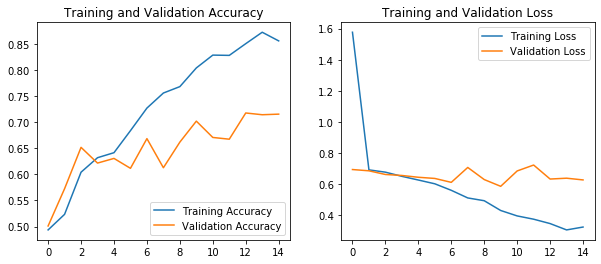

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Horizontal flip augmentation

In [47]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [49]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(img_height, img_width))

Found 2000 images belonging to 2 classes.


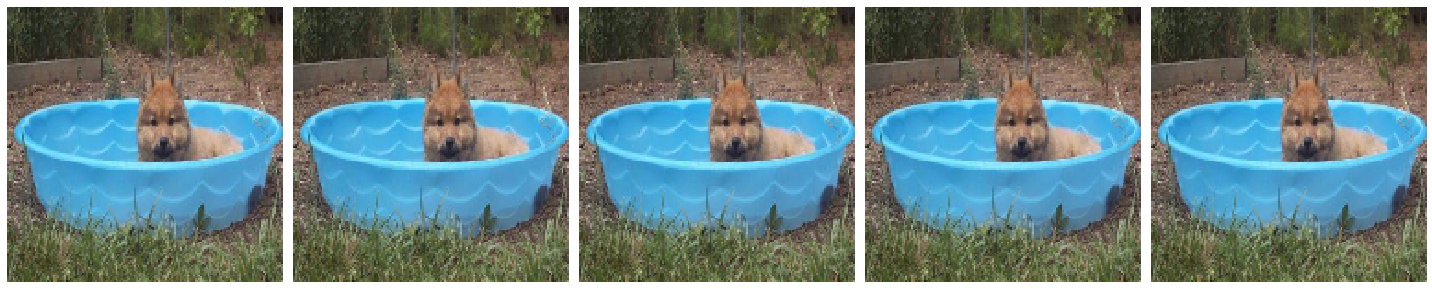

In [50]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

In [51]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(img_height, img_width),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


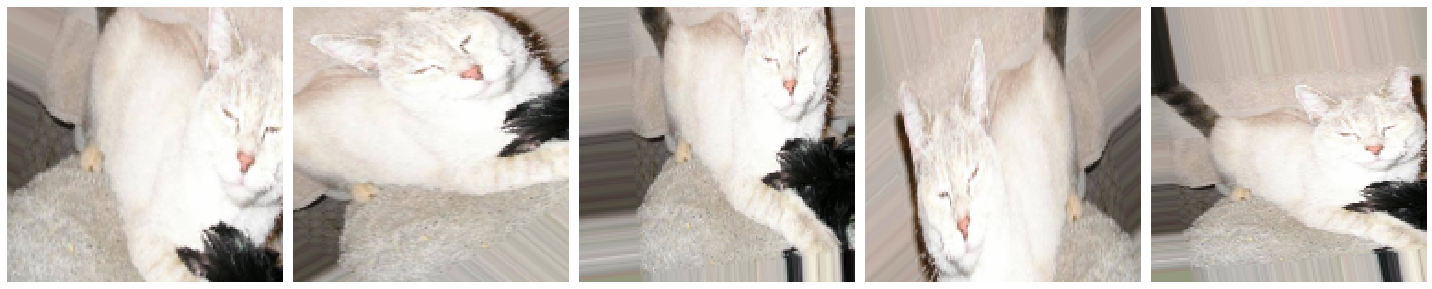

In [53]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

In [54]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(img_height, img_width),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [55]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(img_height, img_width, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [56]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [57]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 33s 2s/step - loss: 1.4769 - accuracy: 0.4915 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 33s 2s/step - loss: 0.6933 - accuracy: 0.5011 - val_loss: 0.6930 - val_accuracy: 0.5022
Epoch 3/15
15/15 [==============================] - 30s 2s/step - loss: 0.6930 - accuracy: 0.4909 - val_loss: 0.6928 - val_accuracy: 0.5145
Epoch 4/15
15/15 [==============================] - 31s 2s/step - loss: 0.6928 - accuracy: 0.5109 - val_loss: 0.6920 - val_accuracy: 0.5056
Epoch 5/15
15/15 [==============================] - 30s 2s/step - loss: 0.6917 - accuracy: 0.5224 - val_loss: 0.6876 - val_accuracy: 0.5770
Epoch 6/15
15/15 [==============================] - 31s 2s/step - loss: 0.6894 - accuracy: 0.5422 - val_loss: 0.6879 - val_accuracy: 0.5547
Epoch 7/15
15/15 [==============================] - 30s 2s/step - los

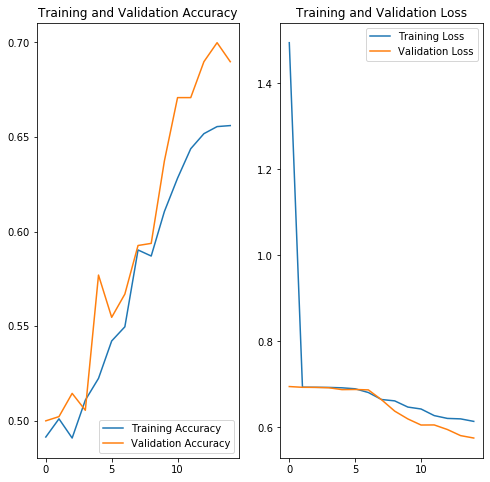

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()